In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [21]:
train = pd.read_csv('Train_BigMartSales.csv')
test = pd.read_csv('Train_BigMartSales.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [22]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066164,140.992878,1997.831867,2181.289052
std,4.643456,0.051641,62.275160,8.371760,1706.499641
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.030000,93.825000,1987.000000,834.245000
50%,12.600000,0.050000,143.010000,1999.000000,1794.330000
75%,16.850000,0.090000,185.645000,2004.000000,3101.300000
max,21.350000,0.330000,266.890000,2009.000000,13086.960000


## Data Pre-processing

In [23]:
## Remove unnecessary variables
train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.02,Dairy,249.81,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,5.92,Regular,0.02,Soft Drinks,48.27,2009,Medium,Tier 3,Supermarket Type2,443.42
2,17.50,Low Fat,0.02,Meat,141.62,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,19.20,Regular,0.00,Fruits and Vegetables,182.10,1998,NaN,Tier 3,Grocery Store,732.38
4,8.93,Low Fat,0.00,Household,53.86,1987,High,Tier 3,Supermarket Type1,994.71


In [24]:
## Deal with Missing values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(train) ## Pass your dataset name

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Outlet_Size,2410,28.3
Item_Weight,1463,17.2


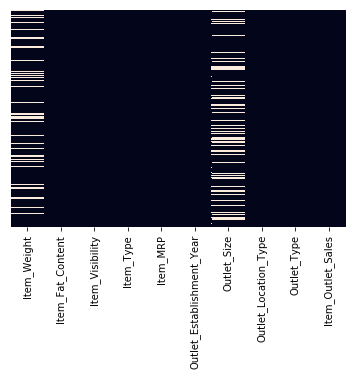

In [25]:
missingdata=train.isnull()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [26]:
# Delete the columns with > 50% missing
missing_df = missing_values_table(train);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index) ## Change 50 to any number you want


print('We will remove %d columns.' % len(missing_columns))
print(missing_columns)

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.
We will remove 0 columns.
[]


In [27]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,np.mean(train['Item_Visibility'])) ## Replace 0 with mean
train['Outlet_Establishment_Year'] = 2018 - train['Outlet_Establishment_Year'] ## convert year into numbers
train['Outlet_Size'].fillna('Medium',inplace=True) ## replace NAN with Small
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
missing_values_table(train) ## Double Check

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [28]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.020000,Dairy,249.81,19,Medium,Tier 1,Supermarket Type1,3735.14
1,5.92,Regular,0.020000,Soft Drinks,48.27,9,Medium,Tier 3,Supermarket Type2,443.42
2,17.50,Low Fat,0.020000,Meat,141.62,19,Medium,Tier 1,Supermarket Type1,2097.27
3,19.20,Regular,0.066164,Fruits and Vegetables,182.10,20,Medium,Tier 3,Grocery Store,732.38
4,8.93,Low Fat,0.066164,Household,53.86,31,High,Tier 3,Supermarket Type1,994.71


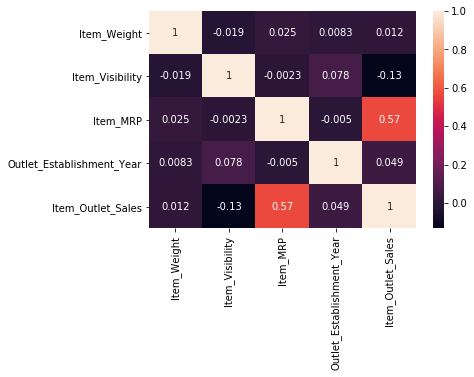

In [29]:
sns.heatmap(train.corr(),annot=True) ## Minus the categorical columns

In [30]:
## Select non numerical categorical column names
mylist = list(train.select_dtypes(include=['object']).columns)
mylist

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [31]:
## Create dummy variables for non numerical categorical variables
dummies = pd.get_dummies(train[mylist], prefix= mylist)
dummies.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [32]:
train.drop(mylist, axis=1, inplace = True) ## Drop Non numerical categorical columns
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.020000,249.81,19,3735.14
1,5.92,0.020000,48.27,9,443.42
2,17.50,0.020000,141.62,19,2097.27
3,19.20,0.066164,182.10,20,732.38
4,8.93,0.066164,53.86,31,994.71


In [33]:
train=pd.concat([train,dummies], axis =1 ) ## added encoded categorical columns
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.020000,249.81,19,3735.14,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.020000,48.27,9,443.42,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.020000,141.62,19,2097.27,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066164,182.10,20,732.38,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066164,53.86,31,994.71,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [34]:
#sns.heatmap(train.corr(),annot=True) ## Minus the categorical columns
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000e+00,-0.018635,0.024756,0.008301,0.011550,-0.002080,0.022808,-0.021263,-0.006014,-0.000379,...,0.012313,-0.006867,-0.001100,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,1.413048e-14
Item_Visibility,-1.863515e-02,1.000000,-0.002319,0.078157,-0.131741,0.011519,-0.052892,0.050722,0.002720,-0.004753,...,-0.043688,-0.032953,0.066142,0.063569,-0.073825,0.012444,0.297859,-0.153042,-0.032426,-5.221213e-02
Item_MRP,2.475646e-02,-0.002319,1.000000,-0.005020,0.567575,-0.006947,-0.000466,0.008299,-0.011904,-0.008865,...,0.002437,-0.010578,0.009793,-0.001229,0.001952,-0.000744,-0.004277,0.004885,0.003850,-6.713837e-03
Outlet_Establishment_Year,8.300836e-03,0.078157,-0.005020,1.000000,0.049135,-0.002458,-0.002218,0.002051,0.026852,-0.021281,...,0.453388,-0.342251,0.056567,0.201690,-0.540820,0.333895,0.281196,-0.245070,-0.466336,5.380723e-01
Item_Outlet_Sales,1.154999e-02,-0.131741,0.567575,0.049135,1.000000,-0.012389,-0.011993,0.022618,-0.006326,-0.015148,...,0.024170,0.075154,-0.098403,-0.111287,0.058261,0.046376,-0.411727,0.108765,-0.038059,3.111920e-01
Item_Fat_Content_LF,-2.079641e-03,0.011519,-0.006947,-0.002458,-0.012389,1.000000,-0.238873,-0.140513,-0.022643,-0.023150,...,-0.005084,-0.006249,0.010318,-0.006275,-0.010932,0.016267,0.009036,-0.019290,0.015137,4.637153e-03
Item_Fat_Content_Low Fat,2.280804e-02,-0.052892,-0.000466,-0.002218,-0.011993,-0.238873,1.000000,-0.871729,-0.140476,-0.143620,...,-0.000374,0.000657,-0.000454,0.000079,0.008213,-0.007960,-0.003339,0.008565,-0.005452,-4.040993e-03
Item_Fat_Content_Regular,-2.126293e-02,0.050722,0.008299,0.002051,0.022618,-0.140513,-0.871729,1.000000,-0.082632,-0.084482,...,-0.002316,0.000693,0.000856,0.001960,-0.002123,0.000237,-0.002307,-0.000734,-0.002037,5.605465e-03
Item_Fat_Content_low fat,-6.014094e-03,0.002720,-0.011904,0.026852,-0.006326,-0.022643,-0.140476,-0.082632,1.000000,-0.013614,...,0.018992,-0.007125,-0.005461,-0.003167,-0.003509,0.006282,0.011658,-0.007121,-0.010567,8.944982e-03
Item_Fat_Content_reg,-3.794890e-04,-0.004753,-0.008865,-0.021281,-0.015148,-0.023150,-0.143620,-0.084482,-0.013614,1.000000,...,0.000665,0.011529,-0.012981,0.004981,-0.004797,0.000026,-0.002625,0.005176,0.017030,-2.205419e-02


In [35]:
X = train.drop('Item_Outlet_Sales',1) ## This is the dependent variable
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.020000,249.81,19,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.020000,48.27,9,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.020000,141.62,19,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066164,182.10,20,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066164,53.86,31,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] ## Replace X with your indepedent data type
vif_s =pd.Series(vif, index =X.columns)
print(vif_s)

C:\Users\smukhopadhyay\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                         1.014694
Item_Visibility                     1.111746
Item_MRP                            1.013586
Outlet_Establishment_Year          49.044114
Item_Fat_Content_LF                      inf
Item_Fat_Content_Low Fat                 inf
Item_Fat_Content_Regular                 inf
Item_Fat_Content_low fat                 inf
Item_Fat_Content_reg                     inf
Item_Type_Baking Goods                   inf
Item_Type_Breads                         inf
Item_Type_Breakfast                      inf
Item_Type_Canned                         inf
Item_Type_Dairy                          inf
Item_Type_Frozen Foods                   inf
Item_Type_Fruits and Vegetables          inf
Item_Type_Hard Drinks                    inf
Item_Type_Health and Hygiene             inf
Item_Type_Household                      inf
Item_Type_Meat                           inf
Item_Type_Others                         inf
Item_Type_Seafood                        inf
Item_Type_

In [37]:
## Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)
y_train.head()

6379    2013.38
1561     446.75
624     4993.50
7967    7266.54
90       369.52
Name: Item_Outlet_Sales, dtype: float64

## Multiple Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [39]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 838.655170448227
MSE: 1306346.5137542442
RMSE: 1142.9551669922334


Model Performance Test: In terms of Cross validation
Explained Variance Score: 55.5249348750518
Cross val Mean Abs Error: -840.2993200318275
Cross Val Explained Variance: 56.048246654659216


Model Performance Test: In terms of r2
r2: 0.5552406001260851
adj_r2= 0.549065836541957


Model Performance Test: Bias-Variance
Training_r2= 0.5659489683635909
Test_r2= 0.5552406001260851


Model Performance Test: MultiCollinearity
VIF Train: 2.3038765654580184
VIF Test: 2.248406667253105


In [ ]:
## 1: 55% of Item_Outlet_sales is driven by the independent variables listed here
## 2: On an average, the prediction is off by 1142
## 3: There is not significant multicollinearity observed
## 4: The Model is free from Bias

                                  0  Coefficient Estimate
0                       Item_Weight             -2.680929
1                   Item_Visibility           -371.093542
2                          Item_MRP             15.499352
3         Outlet_Establishment_Year            -35.210314
4               Item_Fat_Content_LF            -17.483483
5          Item_Fat_Content_Low Fat            -38.515530
6          Item_Fat_Content_Regular            -11.280542
7          Item_Fat_Content_low fat             10.838571
8              Item_Fat_Content_reg             56.440985
9            Item_Type_Baking Goods            -42.502377
10                 Item_Type_Breads            -48.465928
11              Item_Type_Breakfast             34.227915
12                 Item_Type_Canned              1.412617
13                  Item_Type_Dairy             -4.226161
14           Item_Type_Frozen Foods             15.799376
15  Item_Type_Fruits and Vegetables             36.441560
16            

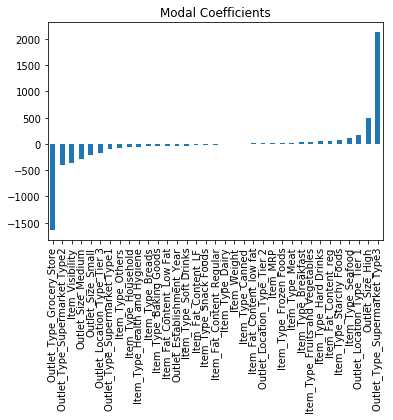

In [40]:
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(regressor.coef_)
print(coeff)

predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Inference : Items are not getting sold in Grocery Stores and Supermarket : Type 3 has very high sales

In [41]:
## Lets validate it

train_inv = pd.read_csv('Train_BigMartSales.csv') ## Read the data once more

print("Mean Sales=",train_inv['Item_Outlet_Sales'].mean())
print("\n")
print(train_inv.groupby(['Outlet_Type'], as_index=False)['Item_Outlet_Sales'].max())
print("\n")
print(train_inv.groupby(['Outlet_Type'], as_index=False)['Item_Outlet_Sales'].mean())

Mean Sales= 2181.289051976997


         Outlet_Type  Item_Outlet_Sales
0      Grocery Store            1775.69
1  Supermarket Type1           10256.65
2  Supermarket Type2            6768.52
3  Supermarket Type3           13086.96


         Outlet_Type  Item_Outlet_Sales
0      Grocery Store         339.828596
1  Supermarket Type1        2316.181316
2  Supermarket Type2        1995.498869
3  Supermarket Type3        3694.038578


In [42]:
train_inv=train_inv[['Outlet_Type','Item_Outlet_Sales']]
train_inv=train_inv[train_inv['Outlet_Type'].isin (['Grocery Store','Supermarket Type3' ])]
train_inv.head()

,Outlet_Type,Item_Outlet_Sales
3,Grocery Store,732.38
7,Supermarket Type3,4022.76
18,Supermarket Type3,2303.67
21,Supermarket Type3,4064.04
23,Grocery Store,214.39


In [ ]:
## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

## Ridge Regression (Will shrink the coefficients to reduce multicollinearity)

In [43]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=0.05, normalize=True) ## play with alpha
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [44]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 838.911849884159
MSE: 1315504.4716103727
RMSE: 1146.9544331011466


Model Performance Test: In terms of Cross validation
Explained Variance Score: 55.213513992460975
Cross val Mean Abs Error: -840.6490904710988
Cross Val Explained Variance: 55.913514441455035


Model Performance Test: In terms of r2
r2: 0.5521226771268827
adj_r2= 0.5459046262341579


Model Performance Test: Bias-Variance
Training_r2= 0.5641047036095013
Test_r2= 0.5521226771268827


Model Performance Test: MultiCollinearity
VIF Train: 2.29412890728728
VIF Test: 2.232754258655105


In [45]:
## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Training_r2= 0.5641047036095013
Test_r2= 0.5521226771268827
VIF Train: 2.29412890728728
VIF Test: 2.232754258655105


                                  0  Coefficient Estimate
0                       Item_Weight             -2.360946
1                   Item_Visibility           -531.401089
2                          Item_MRP             14.745197
3         Outlet_Establishment_Year              0.619731
4               Item_Fat_Content_LF              4.103163
5          Item_Fat_Content_Low Fat            -16.594355
6          Item_Fat_Content_Regular             11.587631
7          Item_Fat_Content_low fat             26.052531
8              Item_Fat_Content_reg             70.008336
9            Item_Type_Baking Goods            -40.678409
10                 Item_Type_Breads            -37.583286
11              Item_Type_Breakfast             44.239387
12                 Item_Type_Canned             12.330814
13                  Item_Type_Dairy              4.886476
14           Item_Type_Frozen Foods             24.184152
15  Item_Type_Fruits and Vegetables             44.297758
16            

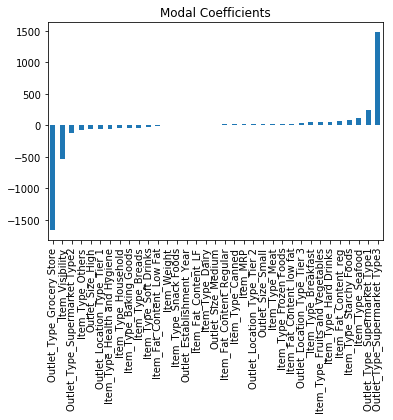

In [46]:
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(regressor.coef_)
print(coeff)

predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

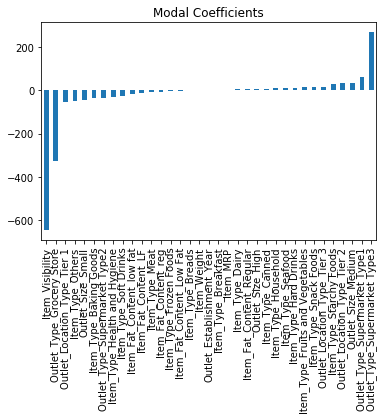

In [47]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=5, normalize=True) ## play with alpha
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [48]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 1191.000767228079
MSE: 2398838.8150720233
RMSE: 1548.818522316938


Model Performance Test: In terms of Cross validation
Explained Variance Score: 18.350513197074402
Cross val Mean Abs Error: -1210.6647888719413
Cross Val Explained Variance: 18.953399112251187


Model Performance Test: In terms of r2
r2: 0.18329011441263177
adj_r2= 0.17195142103874916


Model Performance Test: Bias-Variance
Training_r2= 0.190839104796086
Test_r2= 0.18329011441263177


Model Performance Test: MultiCollinearity
VIF Train: 1.2358481556971352
VIF Test: 1.224424997967071


In [ ]:
## Multi Collinearity is reduced, but it has badly impacted the r2

## The More Alpha is increased, the co-efficients start shrinking. Trick is to find the optimal value of Alpha

## Lasso Regression (Will eliminate features even at small values of alpha)

In [49]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.3, normalize=True) ## play with alpha
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Model Performance Test: In terms of Error")

### same old code

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 836.2591468345569
MSE: 1306016.656647732
RMSE: 1142.810857774694


Model Performance Test: In terms of Cross validation
Explained Variance Score: 55.53569131100971
Cross val Mean Abs Error: -836.2615277154637
Cross Val Explained Variance: 56.20154086964071


Model Performance Test: In terms of r2
r2: 0.5553529034446854
adj_r2= 0.549179699010161


Model Performance Test: Bias-Variance
Training_r2= 0.5636545664274896
Test_r2= 0.5553529034446854


Model Performance Test: MultiCollinearity
VIF Train: 2.291762266910084
VIF Test: 2.2489745412643187


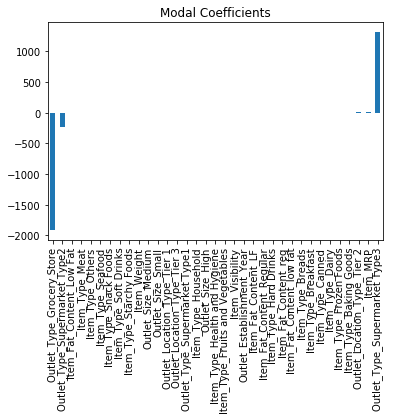

In [50]:
predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [ ]:
## It has eliminated features and adjusted the co-efficients of important features accordingly

## ElasticNet (Best of Lasso and Ridge)

In [52]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(alpha=0.8, l1_ratio=0.3,normalize=False) ## play with alpha and l1_ratio
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Model Performance Test: In terms of Error")

### same old code

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 947.2189267442963
MSE: 1719637.6135603338
RMSE: 1311.3495390475928


Model Performance Test: In terms of Cross validation
Explained Variance Score: 41.46099493130585
Cross val Mean Abs Error: -961.6003810779824
Cross Val Explained Variance: 41.48582742918568


Model Performance Test: In terms of r2
r2: 0.41453130164544727
adj_r2= 0.40640301745567753


Model Performance Test: Bias-Variance
Training_r2= 0.41679346976006615
Test_r2= 0.41453130164544727


Model Performance Test: MultiCollinearity
VIF Train: 1.7146584411333587
VIF Test: 1.7080332438104353


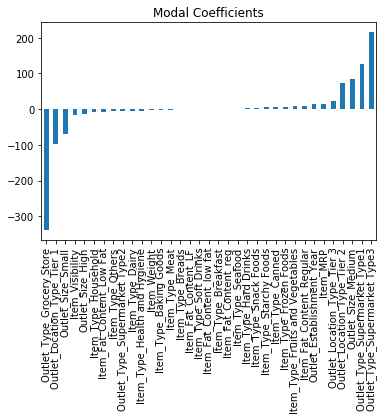

In [53]:
predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [ ]:
## Co-efficients are reduced, but features are not eliminated

## Now : which model to believe ? :)

In [54]:
# Option 1
## Lets drop Outlet_Establishment_Year 
## Lets run Feature Selection

## usual Stuff

train = pd.read_csv('Train_BigMartSales.csv')
test = pd.read_csv('Train_BigMartSales.csv')
train.head()

train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,np.mean(train['Item_Visibility'])) ## Replace 0 with mean
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year'] ## convert year into numbers
train['Outlet_Size'].fillna('Small',inplace=True) ## replace NAN with Small
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

## Select non numerical categorical column names
mylist = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
train.drop(mylist, axis=1, inplace = True)
train=pd.concat([train,dummies], axis =1 ) ## added encoded categorical columns
train.head()

#X = train.drop('Item_Outlet_Sales',1) ## This is the dependent variable
#X.head()

X = train.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis=1) 
X.head()
## Drop Dependant Variable and Outlet establishment Year

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.020000,249.81,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.020000,48.27,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.020000,141.62,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066164,182.10,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.066164,53.86,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [55]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070294,140.992878,0.000704,0.000821,0.000939,0.000352,0.000587,0.000469,0.000704,...,0.109351,0.327702,0.562947,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.048749,62.275160,0.026525,0.028648,0.030625,0.018759,0.024215,0.021660,0.026525,...,0.312098,0.469403,0.496051,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.010000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.030000,93.825000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.060000,143.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.090000,185.645000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.330000,266.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Perform Feature Selection Through Backward Elimination

In [59]:
import statsmodels.formula.api as sm

In [60]:
    ## Though significance level = 0.05, however, if eliminating the variable is reducing the adjusted r2, then we are retaining 
    ## the variable
    def backwardElimination(x, SL):
            numVars = len(x[0])
            temp = np.zeros((8523,1603)).astype(int) ## Only change this line. In this case, we had 8523 rows and 1603 columns
            for i in range(0, numVars):
                regressor_OLS = sm.OLS(y, x).fit()
                maxVar = max(regressor_OLS.pvalues).astype(float)
                adjR_before = regressor_OLS.rsquared_adj.astype(float)
                if maxVar > SL:
                    for j in range(0, numVars - i):
                        if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                            temp[:,j] = x[:, j]
                            x = np.delete(x, j, 1)
                            tmp_regressor = sm.OLS(y, x).fit()
                            adjR_after = tmp_regressor.rsquared_adj.astype(float)
                            if (adjR_before >= adjR_after):
                                x_rollback = np.hstack((x, temp[:,[0,j]]))
                                x_rollback = np.delete(x_rollback, j, 1)
                                print (regressor_OLS.summary())
                                return x_rollback
                            else:
                                continue
            regressor_OLS.summary()
            return x

In [61]:
y = train.iloc[:, 4].values
y[0:5]

array([3735.14,  443.42, 2097.27,  732.38,  994.71])

In [62]:
X=np.append(arr=np.ones((8523,1)).astype(int),values=X, axis=1)
SL = 0.05
X = backwardElimination(X, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     7.972
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:25:37   Log-Likelihood:                -71128.
No. Observations:                8523   AIC:                         1.454e+05
Df Residuals:                    6949   BIC:                         1.565e+05
Df Model:                        1573                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        600.4666    456.724      1.315      0.1

In [ ]:
X.shape

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

MAE: 29724557685.107388
MSE: 1.462552253161494e+23
RMSE: 382433295250.4912


Model Performance Test: In terms of Cross validation
Explained Variance Score: -5.090725119707762e+18
Cross val Mean Abs Error: -59535152452.284325
Cross Val Explained Variance: -7.822113177554967e+19


Model Performance Test: In terms of r2
r2: -5.1139788874417896e+16
adj_r2= -1.3744826536594338e+17


Model Performance Test: Bias-Variance
Training_r2= 0.6704505255185376
Test_r2= -5.1139788874417896e+16


Model Performance Test: MultiCollinearity
VIF Train: 3.034445743157303
VIF Test: 1.955424576459757e-17


In [ ]:
# Option 2
## Lets run Feature Selection and then PCA
## usual Stuff

train = pd.read_csv('Train_BigMartSales.csv')
test = pd.read_csv('Train_BigMartSales.csv')
train.head()

train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,np.mean(train['Item_Visibility'])) ## Replace 0 with mean
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year'] ## convert year into numbers
train['Outlet_Size'].fillna('Small',inplace=True) ## replace NAN with Small
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

## Select non numerical categorical column names
mylist = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
train.drop(mylist, axis=1, inplace = True)
train=pd.concat([train,dummies], axis =1 ) ## added encoded categorical columns
train.head()

#X = train.drop('Item_Outlet_Sales',1) ## This is the dependent variable
#X.head()

X = train.drop(['Item_Outlet_Sales'], axis=1) 
X.head()

In [ ]:
    ## Though significance level = 0.05, however, if eliminating the variable is reducing the adjusted r2, then we are retaining 
    ## the variable
    def backwardElimination_r2(x, SL):
            numVars = len(x[0])
            temp = np.zeros((8523,1604)).astype(int) ## Only change this line. In this case, we had 8523 rows and 1603 columns
            for i in range(0, numVars):
                regressor_OLS = sm.OLS(y, x).fit()
                maxVar = max(regressor_OLS.pvalues).astype(float)
                adjR_before = regressor_OLS.rsquared_adj.astype(float)
                if maxVar > SL:
                    for j in range(0, numVars - i):
                        if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                            temp[:,j] = x[:, j]
                            x = np.delete(x, j, 1)
                            tmp_regressor = sm.OLS(y, x).fit()
                            adjR_after = tmp_regressor.rsquared_adj.astype(float)
                            if (adjR_before >= adjR_after):
                                x_rollback = np.hstack((x, temp[:,[0,j]]))
                                x_rollback = np.delete(x_rollback, j, 1)
                                print (regressor_OLS.summary())
                                return x_rollback
                            else:
                                continue
            regressor_OLS.summary()
            return x

In [ ]:
X=np.append(arr=np.ones((8523,1)).astype(int),values=X, axis=1)
y = train.iloc[:, 4].values
SL = 0.05
X = backwardElimination_r2(X, SL)
X.shape

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 50, kernel = 'rbf') ## Keep on playing with n_components. Start with 5. Best value found at 
X = kpca.fit_transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 100, kernel = 'rbf') ## Keep on playing with n_components. Start with 5.  
X = kpca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)